# About Dataset
If you continuously find you have a high customer churn rate, you’ll quickly find that your business isn’t sustainable. Getting new customers to sign up to your service is one thing, but it’s not enough to keep your business afloat for long. To survive, your business needs loyal customers, and that means continuously looking at ways you can improve your service to keep your customers happy. If you don’t, your business will become unviable.
## What causes churn in telecoms?
* Poor service experience
* Poor customer service or experience
* Easy to switch providers
## How to reduce churn rate in telecoms?
* Improve customer service
* Create a memorable customer experience
* Invest in new technologies
* Make Better use of data

## Here is a summarized explanation of all the features in dataset:
### Customer Information
* CustomerID – Unique identifier for each customer.
* Gender – Whether the customer is male or female.
* SeniorCitizen – Indicates if the customer is a senior citizen (1) or not (0).
* Partner – Whether the customer has a partner (Yes/No).
* Dependents – Whether the customer has dependents (Yes/No).
### Account & Contract Details
* Tenure – Number of months the customer has stayed with the company.
* Contract – Type of contract (Month-to-month, One year, Two year).
* PaperlessBilling – Whether the customer has opted for paperless billing (Yes/No).
* PaymentMethod – The method used for bill payments (e.g., credit card, electronic check).
### Services Subscribed
* PhoneService – Whether the customer has a phone service (Yes/No).
* MultipleLines – Whether the customer has multiple phone lines (Yes/No/No phone service).
* InternetService – Type of internet service (DSL, Fiber optic, No).
* OnlineSecurity – Whether the customer has an online security service (Yes/No/No internet service).
* OnlineBackup – Whether the customer has an online backup service (Yes/No/No internet service).
* DeviceProtection – Whether the customer has device protection (Yes/No/No internet service).
* TechSupport – Whether the customer has technical support (Yes/No/No internet service).
* StreamingTV – Whether the customer has a streaming TV service (Yes/No/No internet service).
* StreamingMovies – Whether the customer has a streaming movie service (Yes/No/No internet service).
### Billing & Charges
* MonthlyCharges – The amount charged to the customer every month.
* TotalCharges – The total amount the customer has paid so far.
### Target Variable
* Churn – Indicates whether the customer has left the service (Yes/No).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customers-churned-in-telecom-services/customer_churn_telecom_services.csv


# 1. DATA EXPLORATION AND CLEANING

In [2]:
data = pd.read_csv('/kaggle/input/customers-churned-in-telecom-services/customer_churn_telecom_services.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Checking for missing values

In [5]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Filling missing values with median for numerical columns

In [6]:
data.fillna(data.median(numeric_only=True), inplace=True)

## Encoding categorical variables

In [7]:
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

## Defining features and target variable

In [8]:
X = data.drop(columns=['Churn'])  # Dropping the target variable
y = data['Churn']

## Scaling the data

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. DATA VISUALIZATION

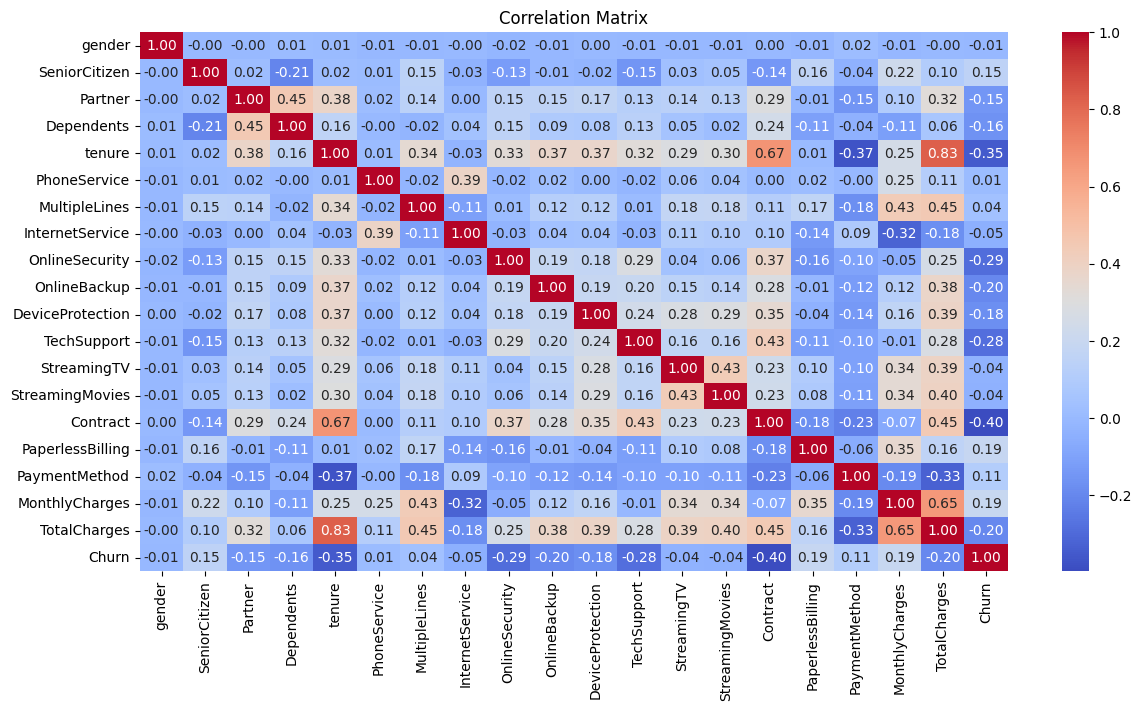

In [10]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Churn distribution

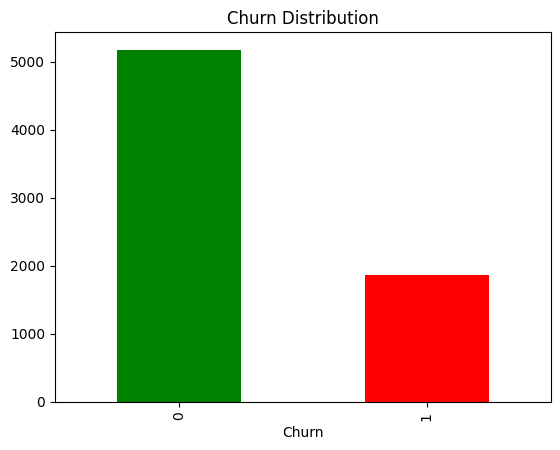

In [11]:
data['Churn'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Churn Distribution")
plt.show()

# 3. MACHINE LEARNING PREDICTION

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=537)


# Random Forest Model

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

## Model Performance

Accuracy: 0.7771469127040455
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1027
           1       0.62      0.45      0.52       382

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.76      0.78      0.76      1409



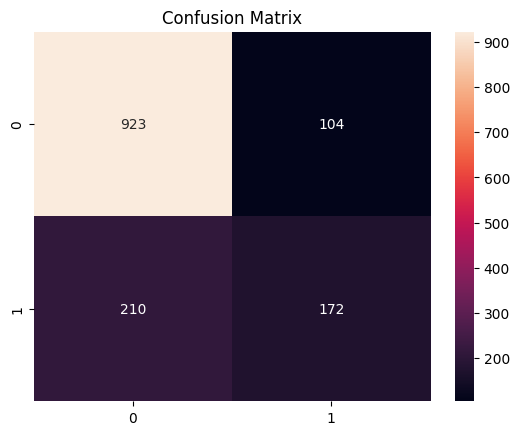

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# 4. DEEP LEARNING PREDICTION

In [15]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6621 - loss: 0.5925 - val_accuracy: 0.7750 - val_loss: 0.4530
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7709 - loss: 0.4617 - val_accuracy: 0.7899 - val_loss: 0.4418
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7933 - loss: 0.4413 - val_accuracy: 0.7871 - val_loss: 0.4379
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7916 - loss: 0.4369 - val_accuracy: 0.7942 - val_loss: 0.4377
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8048 - loss: 0.4233 - val_accuracy: 0.7921 - val_loss: 0.4352
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7982 - loss: 0.4264 - val_accuracy: 0.7949 - val_loss: 0.4326
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7984 - loss: 0.4223 - val_accuracy: 0.7963 - val_loss: 0.4337
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7929 - loss: 0.4295 - val_accuracy: 0.

## Visualizing Model Performance

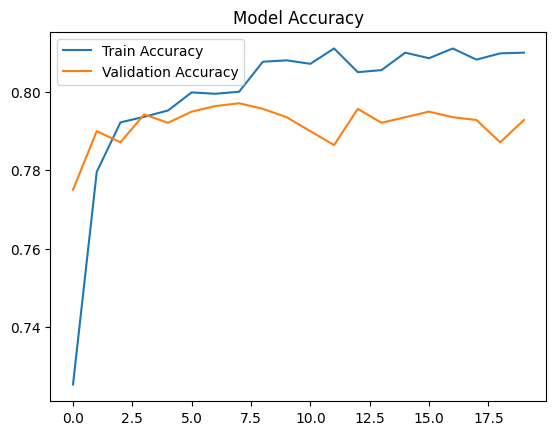

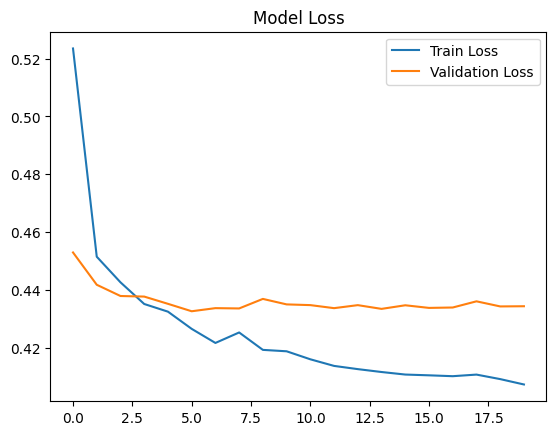

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


## Model Evaluation

In [17]:
y_pred_dl = (model.predict(X_test) > 0.5).astype('int32')
print("DL Model Accuracy:", accuracy_score(y_test, y_pred_dl))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
DL Model Accuracy: 0.7927608232789212


# Summary
In this study, we performed customer churn analysis. The process steps are summarized as follows:

## Data Exploration and Cleaning
* The dataset was loaded and inspected.
* Missing values were identified and filled with the median for numerical data.
* Categorical variables were converted to numerical values using Label Encoding.
* Independent variables (X) and the target variable (y) were defined.
* Data was scaled using StandardScaler to prepare it for machine learning algorithms.

## Data Visualization
* A correlation matrix was plotted to observe relationships between variables.
* The distribution of customer churn was visualized using a bar chart.

## Machine Learning Prediction
* The dataset was split into training and testing sets.
* A Random Forest model was trained to predict customer churn.
* Model accuracy was calculated, and performance was evaluated using a classification report.
* A confusion matrix was plotted to visualize the model’s prediction performance.

## Deep Learning Prediction
* A neural network model (Sequential) was created.
* The model consists of hidden layers with 64 and 32 neurons, with Dropout layers to prevent overfitting.
* The model was trained, and accuracy/loss plots were analyzed.
* Predictions were made on the test dataset, and the deep learning model's accuracy was evaluated.

# Thank you for taking the time to review my work. I would be very happy if you could upvote! 😊